In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='notebook', style='darkgrid', palette='pastel')

## Understand the shape of the data

In [2]:
population_df = pd.read_csv('data/World Bank Population.csv')
metadata_df = pd.read_csv('data/Country Metadata.csv')

In [3]:
population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [4]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [5]:
metadata_df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [6]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  126 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.5+ KB


## Data Cleaning

In [7]:
population_df = population_df.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 67']).dropna()
metadata_df = metadata_df.drop(columns=['SpecialNotes', 'Unnamed: 5']).dropna()

df = (population_df.merge(metadata_df, on='Country Code')
                   .rename(columns={'Country Name': 'Country', 'IncomeGroup': 'Income'}))

In [8]:
df.head()

,Country,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2016,2017,2018,2019,2020,2021,2022,Region,Income,TableName
0,Aruba,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,Latin America & Caribbean,High income,Aruba
1,Afghanistan,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,South Asia,Low income,Afghanistan
2,Angola,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,Sub-Saharan Africa,Lower middle income,Angola
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0,Europe & Central Asia,Upper middle income,Albania
4,Andorra,AND,9443.0,10216.0,11014.0,11839.0,12690.0,13563.0,14546.0,15745.0,...,72540.0,73837.0,75013.0,76343.0,77700.0,79034.0,79824.0,Europe & Central Asia,High income,Andorra


In [9]:
df = df.melt(id_vars=['Country', 'Region', 'Income'],
             value_vars=[str(year) for year in range(1960, 2023)],
             var_name='Year',
             value_name='Population')

In [10]:
df.head()

,Country,Region,Income,Year,Population
0,Aruba,Latin America & Caribbean,High income,1960,54608.0
1,Afghanistan,South Asia,Low income,1960,8622466.0
2,Angola,Sub-Saharan Africa,Lower middle income,1960,5357195.0
3,Albania,Europe & Central Asia,Upper middle income,1960,1608800.0
4,Andorra,Europe & Central Asia,High income,1960,9443.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13545 entries, 0 to 13544
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     13545 non-null  object 
 1   Region      13545 non-null  object 
 2   Income      13545 non-null  object 
 3   Year        13545 non-null  object 
 4   Population  13545 non-null  float64
dtypes: float64(1), object(4)
memory usage: 529.2+ KB


In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

Country       0
Region        0
Income        0
Year          0
Population    0
dtype: int64

In [14]:
from pandas.api.types import CategoricalDtype

df['Year'] = df['Year'].astype(CategoricalDtype(categories=sorted(df['Year'].unique()), ordered=True))
df['Income'] = (df['Income'].str.replace(' income', '')
                            .str.title()
                            .astype(CategoricalDtype(categories=['High', 'Upper Middle', 'Lower Middle', 'Low',], ordered=True)))


df['Country'] = df['Country'].astype('category')
df['Region'] = df['Region'].astype('category')

df['Population'] = df['Population'].astype(int)

## Data Exploration

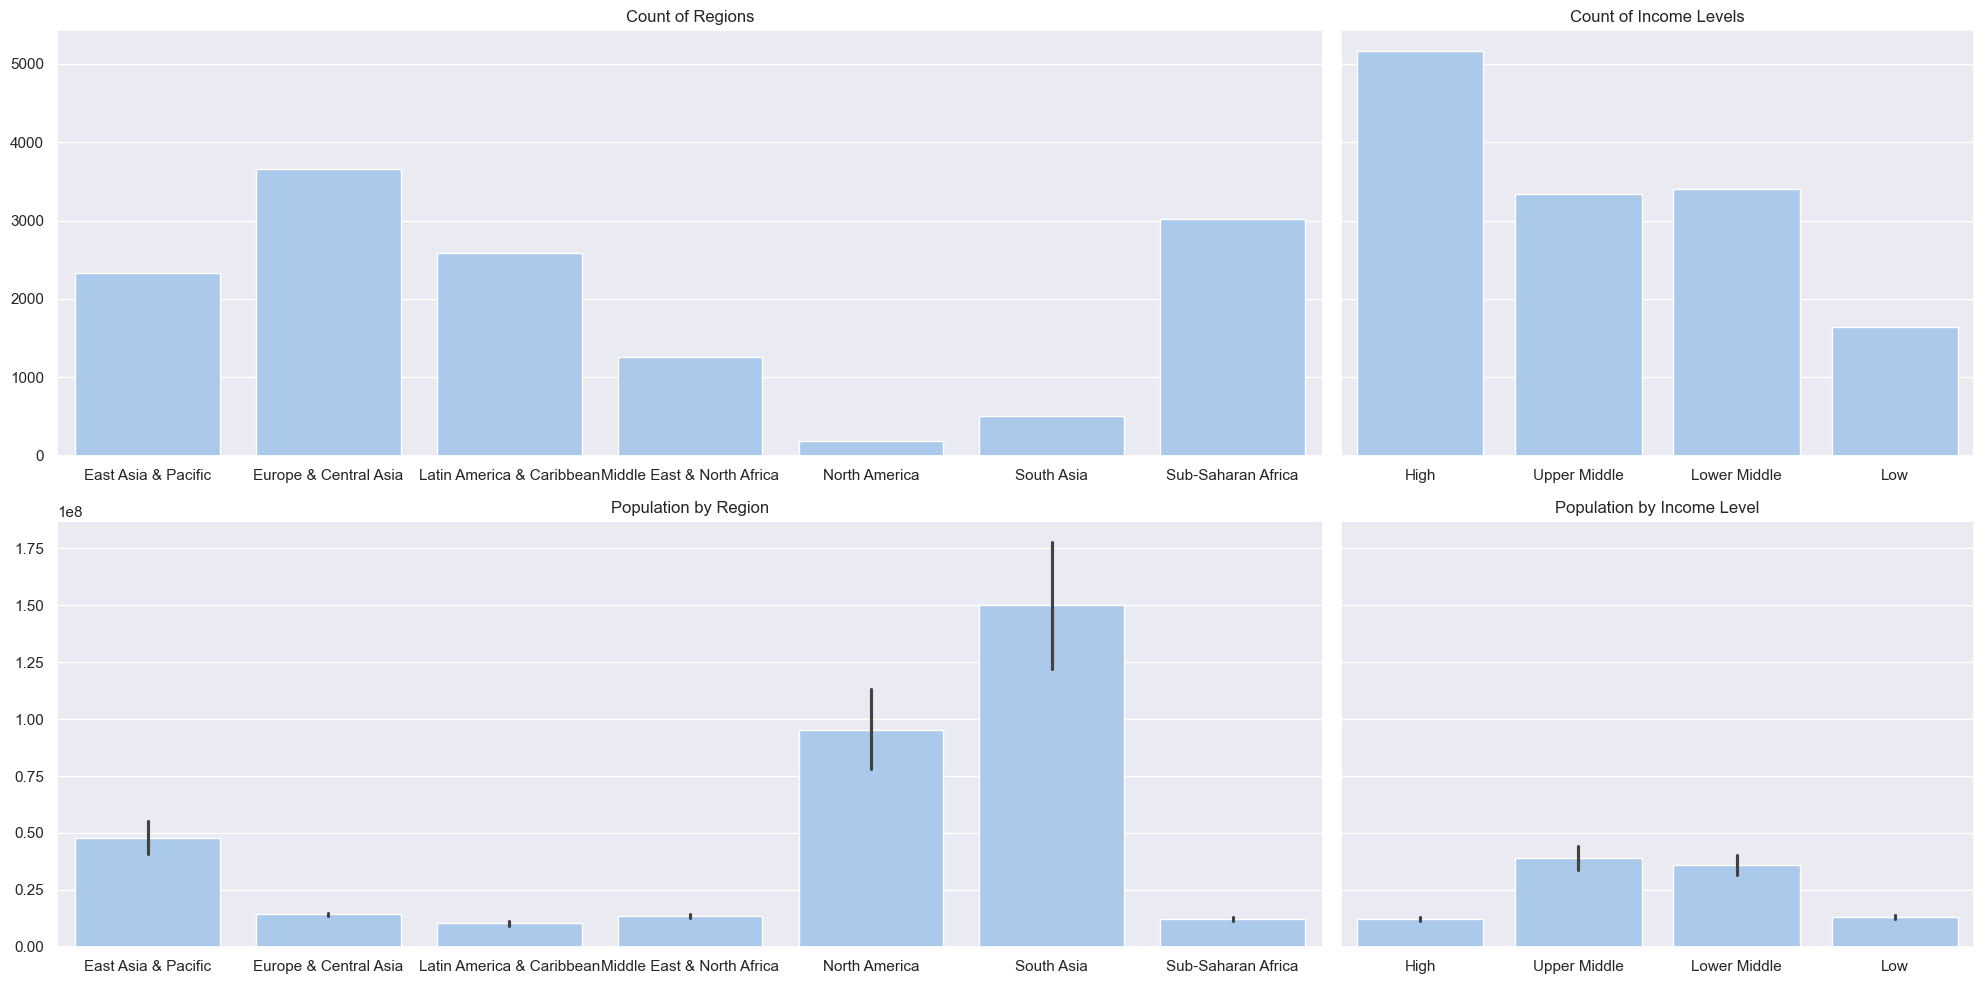

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(20, 10),
                                             gridspec_kw={'width_ratios': [2, 1]},
                                             sharey='row')

sns.countplot(data=df, x='Region', ax=ax1)
ax1.set_title('Count of Regions')

sns.countplot(data=df, x='Income', ax=ax2)
ax2.set_title('Count of Income Levels')

sns.barplot(data=df, x='Region', y='Population', ax=ax3)
ax3.set_title('Population by Region')

sns.barplot(data=df, x='Income', y='Population', ax=ax4)
ax4.set_title('Population by Income Level')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show();

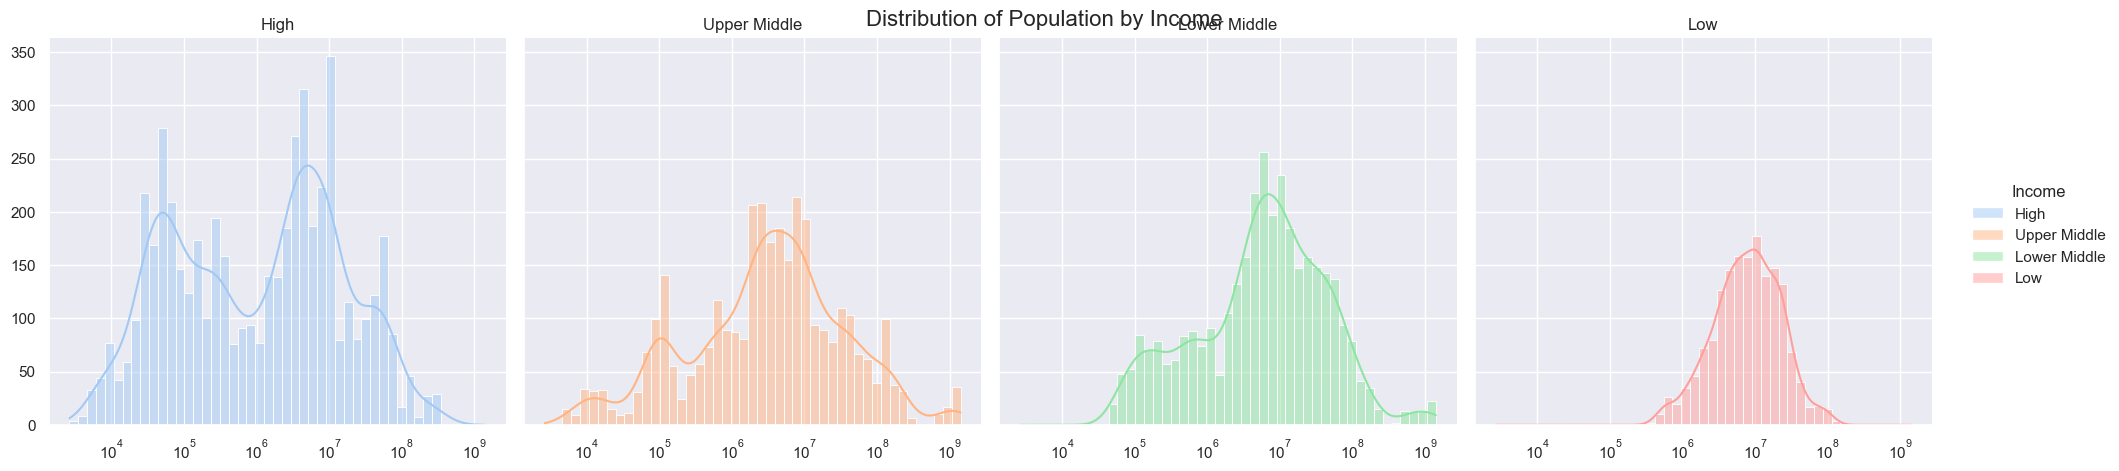

In [16]:
g = sns.displot(data=df,
                x='Population',
                col='Income',
                hue='Income',
                kind='hist',
                kde=True,
                log_scale=True)

g.set_titles(col_template='{col_name}')
g.set_axis_labels('', '')

plt.suptitle('Distribution of Population by Income', fontsize=16)

plt.show();

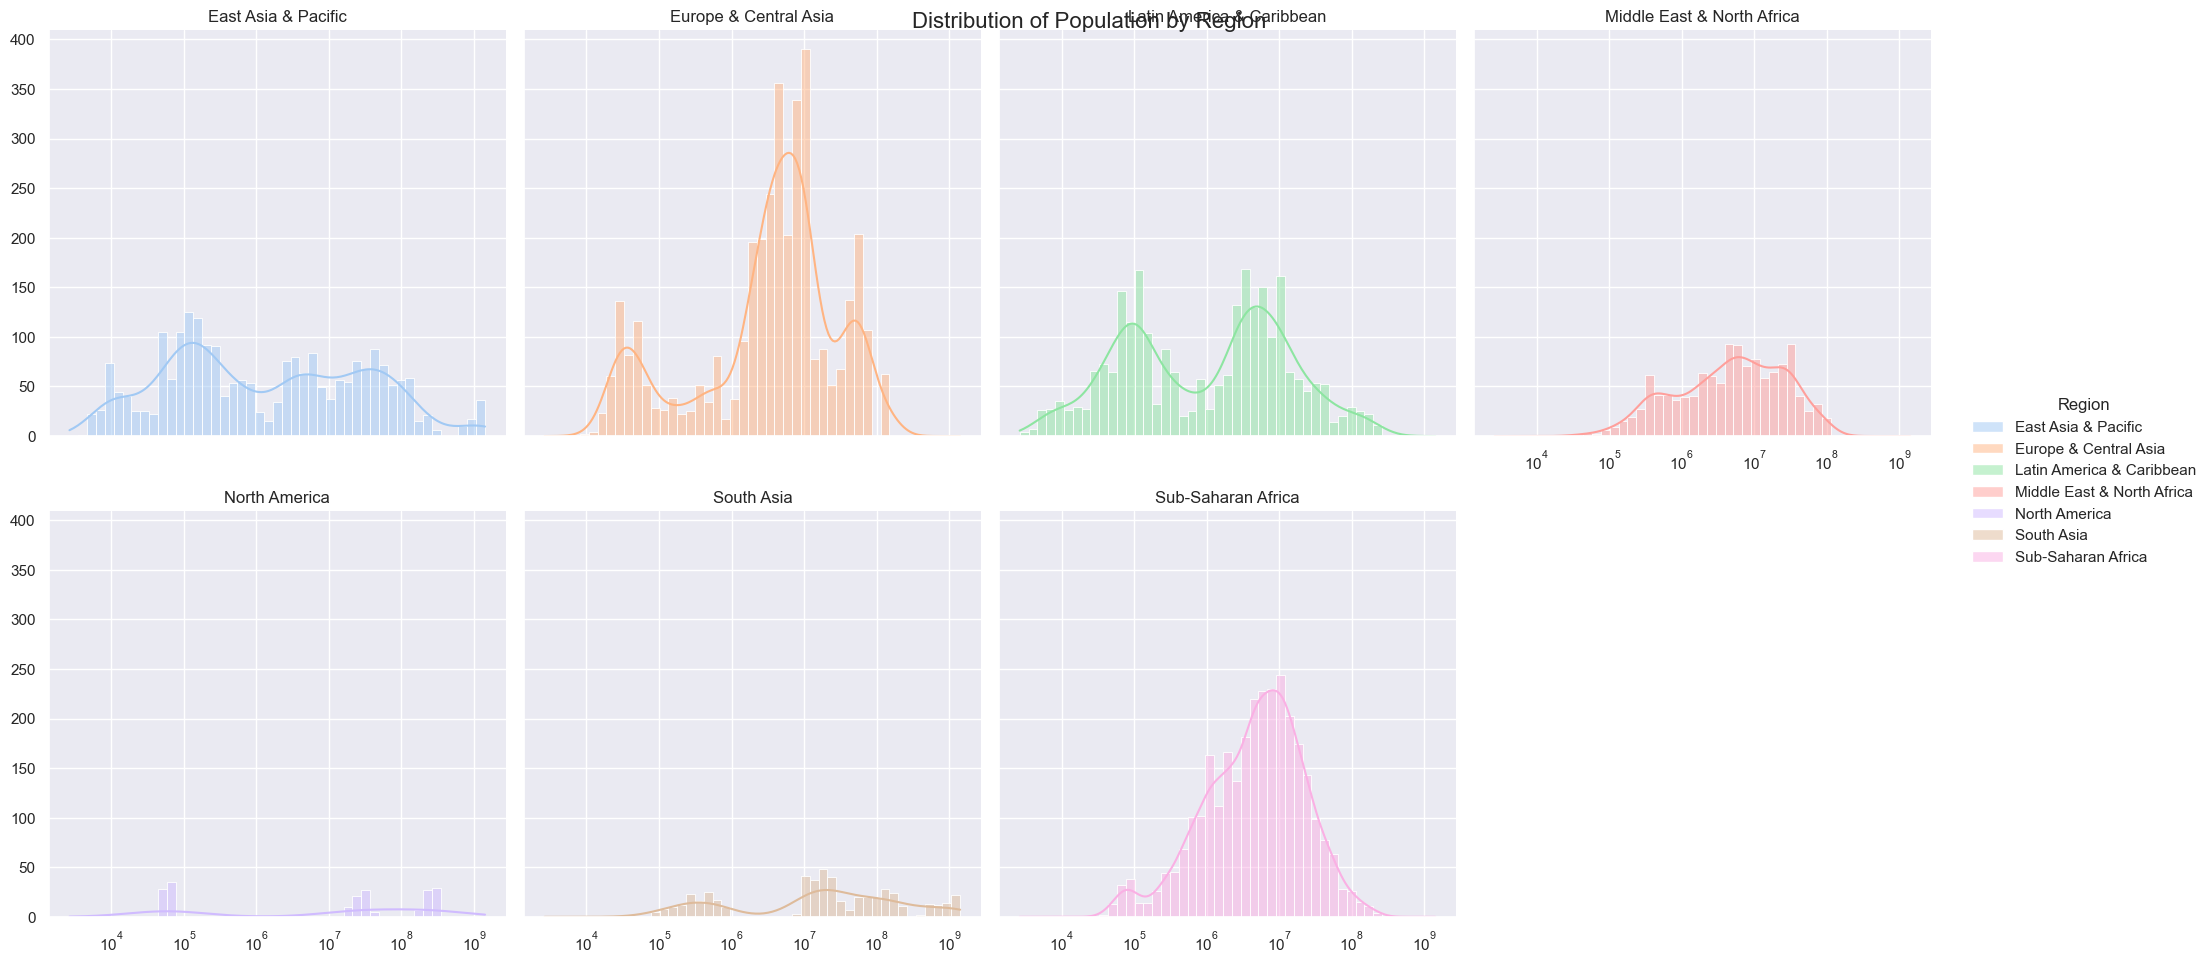

In [17]:
g = sns.displot(data=df,
                x='Population',
                col='Region',
                col_wrap=4,
                hue='Region',
                kind='hist',
                kde=True,
                log_scale=True)

g.set_titles(col_template='{col_name}')
g.set_axis_labels('', '')

plt.suptitle('Distribution of Population by Region', fontsize=16)

plt.show();

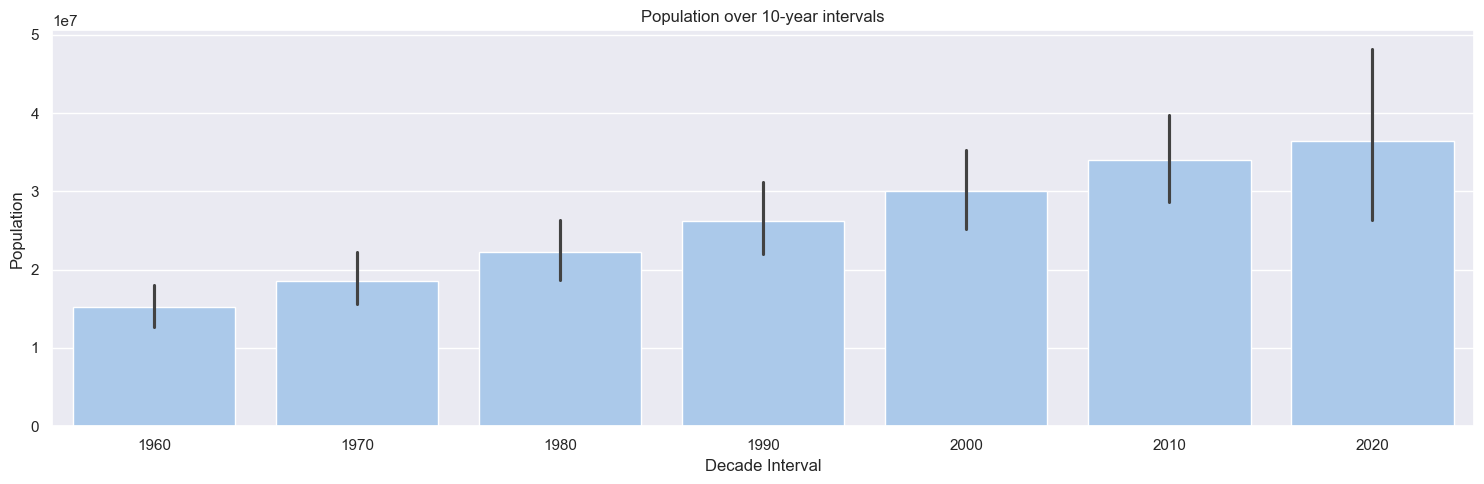

In [18]:
df['Year Interval'] = (df['Year'].astype(int) // 10 * 10).astype('category')

plt.figure(figsize=(15, 5))

sns.barplot(data=df, x='Year Interval', y='Population')
plt.title('Population over 10-year intervals')
plt.xlabel('Decade Interval')
plt.ylabel('Population')

plt.tight_layout()
plt.show();